In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import tensorflow as tf 
import keras 
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2024-10-03 16:56:04.754524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 16:56:04.770761: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 16:56:04.775939: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one ha

In [2]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

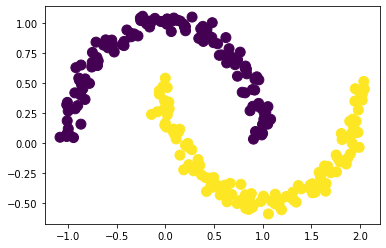

In [3]:
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.show()

In [4]:
model = Sequential()

model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(loss='binary_crossentropy',optimizer='adam', 
              metrics=['accuracy'])

In [6]:
model.get_weights()[0]

array([[ 0.14341462, -0.07000118,  0.4457783 ,  0.54686373,  0.32270437,
        -0.12471068, -0.390851  ,  0.00556827, -0.43984315,  0.09305149],
       [ 0.15142   ,  0.5224715 , -0.45265597,  0.5090051 , -0.6044092 ,
         0.29176068,  0.20483506,  0.45250183,  0.00360256,  0.65976924]],
      dtype=float32)

In [8]:
old_weights = model.get_weights()[0]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                   random_state=4)

In [10]:
model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4817 - loss: 0.7488  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5335 - loss: 0.7075 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5060 - loss: 0.7141 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5281 - loss: 0.6979 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4927 - loss: 0.7054 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5022 - loss: 0.6978 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 0.6936 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4930 - loss: 0.6946 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5229 - loss: 0.6889 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4945 - loss: 0.6913 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5090 - loss: 0.6892 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5189 - lo

In [11]:
new_weights = model.get_weights()[0]

In [12]:
model.optimizer.get_config()['learning_rate']

0.0010000000474974513

In [15]:
gradient = (old_weights - new_weights)/0.001
percent_change = abs(100*(old_weights - new_weights)/old_weights)

In [16]:
gradient

array([[ -581.2541 ,   607.2341 ,  -487.16595,   631.90173,  -493.9318 ,
          587.8209 ,   302.0047 ,   679.3797 ,   442.43597,   674.7879 ],
       [  933.9595 , -1010.13153,   976.76276,  -817.24646,  1030.7292 ,
         -954.37616,  -696.57446, -1099.4768 ,  -873.45526, -1061.8782 ]],
      dtype=float32)

In [17]:
percent_change

array([[  405.2963  ,   867.46265 ,   109.28436 ,   115.550125,
          153.06017 ,   471.34772 ,    77.26851 , 12200.921   ,
          100.5895  ,   725.1769  ],
       [  616.80066 ,   193.33717 ,   215.78482 ,   160.55762 ,
          170.535   ,   327.10925 ,   340.06604 ,   242.97731 ,
        24245.377   ,   160.94691 ]], dtype=float32)

In [18]:
old_weights

array([[ 0.14341462, -0.07000118,  0.4457783 ,  0.54686373,  0.32270437,
        -0.12471068, -0.390851  ,  0.00556827, -0.43984315,  0.09305149],
       [ 0.15142   ,  0.5224715 , -0.45265597,  0.5090051 , -0.6044092 ,
         0.29176068,  0.20483506,  0.45250183,  0.00360256,  0.65976924]],
      dtype=float32)

In [19]:
new_weights

array([[ 0.72466874, -0.6772353 ,  0.9329443 , -0.08503798,  0.8166362 ,
        -0.7125316 , -0.6928557 , -0.67381144, -0.88227916, -0.58173645],
       [-0.78253955,  1.5326031 , -1.4294188 ,  1.3262516 , -1.6351385 ,
         1.2461369 ,  0.90140957,  1.5519787 ,  0.87705785,  1.7216475 ]],
      dtype=float32)

In [20]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
old_weights = model.get_weights()[0]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.29, random_state=42)

In [24]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5003 - loss: 0.6925
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5710 - loss: 0.6904 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6107 - loss: 0.6882 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6629 - loss: 0.6831 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6394 - loss: 0.6773 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6116 - loss: 0.6733 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6681 - loss: 0.6603 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6762 - loss: 0.6375 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7528 - loss: 0.6124 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6898 - loss: 0.5916 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7362 - loss: 0.5526 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7835 - loss

In [25]:
new_weights = model.get_weights()[0]

In [26]:
model.optimizer.get_config()['learning_rate']

0.0010000000474974513

In [27]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [28]:
gradient

array([[ -57.55199  ,  151.64398  ,   34.403397 ,   -5.293518 ,
          -4.9144325,   -1.3975202,    8.697688 ,  -68.08215  ,
        -136.42096  , -193.46808  ],
       [-107.18169  ,   -6.145626 ,   -9.330481 ,   -6.528258 ,
          55.53208  ,  198.33997  ,   36.026714 ,   73.64347  ,
          26.346348 ,   92.04632  ]], dtype=float32)

In [29]:
percent_change

array([[8.9428917e+01, 4.2179211e+01, 1.2677967e+01, 1.1881338e+00,
        2.5661874e+00, 1.0340233e+00, 1.2567739e+00, 1.4013495e+01,
        2.4666853e+01, 4.9694828e+01],
       [3.5658967e+03, 1.9099544e+00, 2.4339051e+00, 1.2728291e+00,
        1.9421227e+01, 4.2622070e+01, 1.9180305e+01, 3.8485409e+01,
        1.7941685e+01, 2.1638632e+01]], dtype=float32)

In [30]:
old_weights

array([[ 0.06435502, -0.35952306,  0.27136368, -0.44553214,  0.19150716,
        -0.13515365,  0.6920647 ,  0.48583275,  0.5530538 ,  0.38931233],
       [-0.00300574,  0.32176822,  0.38335437, -0.51289356,  0.28593498,
        -0.4653457 ,  0.18783182, -0.19135427,  0.14684433,  0.42537957]],
      dtype=float32)

In [31]:
new_weights

array([[ 0.12190701, -0.51116705,  0.23696028, -0.44023862,  0.1964216 ,
        -0.13375613,  0.683367  ,  0.5539149 ,  0.68947476,  0.5827804 ],
       [ 0.10417595,  0.32791385,  0.39268485, -0.5063653 ,  0.2304029 ,
        -0.6636857 ,  0.1518051 , -0.26499775,  0.12049798,  0.33333325]],
      dtype=float32)